<a href="https://colab.research.google.com/github/Manvi190502/AgenticAI/blob/main/RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

!pip install langchain langchain-core langchain_community langgraph langchain-huggingface transformers torch langchain_chroma unstructured

  Using cached langchain_chroma-1.1.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached chromadb-1.5.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.2 kB)
  Using cached build-1.4.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached pybase64-1.4.3-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (8.7 kB)
  Using cached posthog-5.4.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached onnxruntime-1.24.1-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (4.9 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.39.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached pypika-0.51.1-py2.py3-none-any.whl.metadata (51 kB)
  Using cached bcrypt-5.0.0-cp39-abi3-manylinux_2_34_x86_64.whl.metadata (10 kB)
  Using cached kubernetes-35.0.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached pyproject_hooks-1.2.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached durationpy-0.10-py3-none-any.whl.me

In [1]:
#!pip install unstructured
from logging import LoggerAdapter
from langchain_community.document_loaders import UnstructuredURLLoader

urls=['https://docs.langchain.com/oss/python/langgraph/overview']
Loader = UnstructuredURLLoader(urls=urls)
data = Loader.load()

In [2]:
data

[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview'}, page_content='Skip to main content\n\nDocs by LangChain home page\n\nlight logo\n\ndark logo\n\nDeep AgentsLangChainLangGraphIntegrationsLearnReferenceContribute\n\nOverview\n\nGet started\n\nInstall\n\nQuickstart\n\nLocal server\n\nChangelog\n\nThinking in LangGraph\n\nWorkflows + agents\n\nCapabilities\n\nPersistence\n\nDurable execution\n\nStreaming\n\nInterrupts\n\nTime travel\n\nMemory\n\nSubgraphs\n\nProduction\n\nApplication structure\n\nTest\n\nLangSmith Studio\n\nAgent Chat UI\n\nLangSmith Deployment\n\nLangSmith Observability\n\nLangGraph APIs\n\nRuntime\n\nInstall\n\nCore benefits\n\nLangGraph ecosystem\n\nAcknowledgements\n\nLangGraph overview\n\nGain control with LangGraph to design agents that reliably handle complex tasks\n\nTrusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime fo

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(data)
print("Total number of documents: ",len(all_splits))

Total number of documents:  6


In [4]:
from langchain_community.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()

vector = embeddings.embed_query("hello, world!")
vector[:5]

/tmp/ipython-input-2980807805.py:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings()
/tmp/ipython-input-2980807805.py:2: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/toke

[0.034922681748867035,
 0.018830012530088425,
 -0.01785474270582199,
 0.0001388596574543044,
 0.07407369464635849]

In [5]:
from langchain_chroma import Chroma
from langchain_core.documents import Document

vectorstore = Chroma.from_documents(documents=all_splits, embedding=HuggingFaceEmbeddings())

/tmp/ipython-input-656748580.py:4: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  vectorstore = Chroma.from_documents(documents=all_splits, embedding=HuggingFaceEmbeddings())


In [6]:
#if you want to store chromaDb locally
'''
vectorstore = Chroma.from_documents(
    documents=all_splits,
    embedding=HuggingFaceEmbeddings(),
    persist_directory="./chroma_db"    #Custom directory
)
'''

#loading the database later
'''
vectorstore = Chroma(
    persist_directory="./chroma_db",
    embedding_function=HuggingFaceEmbeddings(),
'''

'\nvectorstore = Chroma(\n    persist_directory="./chroma_db",\n    embedding_function=HuggingFaceEmbeddings(),\n'

In [18]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import torch

model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto"
)

text_generation_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    temperature=0.7,
)

from langchain_huggingface import HuggingFacePipeline
llm = HuggingFacePipeline(pipeline=text_generation_pipeline)


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Device set to use cpu


In [19]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("""
You are a helpful assistant.
Answer the question using ONLY the provided context.
If the answer is not in the context, say:
"I don't know based on the provided information."

Context:
{context}

Question:
{question}

Answer:
""")


In [20]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class State(TypedDict):
  question: str
  context: List[Document]
  answer: str

In [21]:
def retrieve(state: State):
  retrieved_docs = vectorstore.similarity_search(state["question"],k=1)
  return {"context": retrieved_docs}

In [22]:
def generate(state: State):
  docs_content = "\n\n".join(doc.page_content for doc in state["context"])
  messages = prompt.invoke({"question":state["question"],"context":docs_content})
  response = llm.invoke(messages)
  return {"answer": response}

In [23]:
from langgraph.graph import START, StateGraph
graph_builder= StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START,"retrieve")
graph = graph_builder.compile()

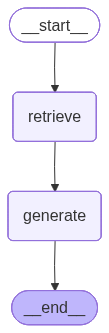

In [24]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
response = graph.invoke({"question":"What is langgraph?"})
print(response["answer"])

Human: 
You are a helpful assistant.
Answer the question using ONLY the provided context.
If the answer is not in the context, say:
"I don't know based on the provided information."

Context:
Skip to main content

Docs by LangChain home page

light logo

dark logo

Deep AgentsLangChainLangGraphIntegrationsLearnReferenceContribute

Overview

Get started

Install

Quickstart

Local server

Changelog

Thinking in LangGraph

Workflows + agents

Capabilities

Persistence

Durable execution

Streaming

Interrupts

Time travel

Memory

Subgraphs

Production

Application structure

Test

LangSmith Studio

Agent Chat UI

LangSmith Deployment

LangSmith Observability

LangGraph APIs

Runtime

Install

Core benefits

LangGraph ecosystem

Acknowledgements

LangGraph overview

Gain control with LangGraph to design agents that reliably handle complex tasks

Question:
What is langgraph?

Answer:
Langgraph is a powerful and flexible language processing framework that allows you to design agents that c